# Singly Linked Lists

Like an array, in that it stores elements in an ordered sequence. Linked lists are made up of objects called ListNode's. This object contains two attributes:

- value: This stores the value of the node. It could be a character, an integer, etc.
- next: This stores the reference to the next node in the linked list.

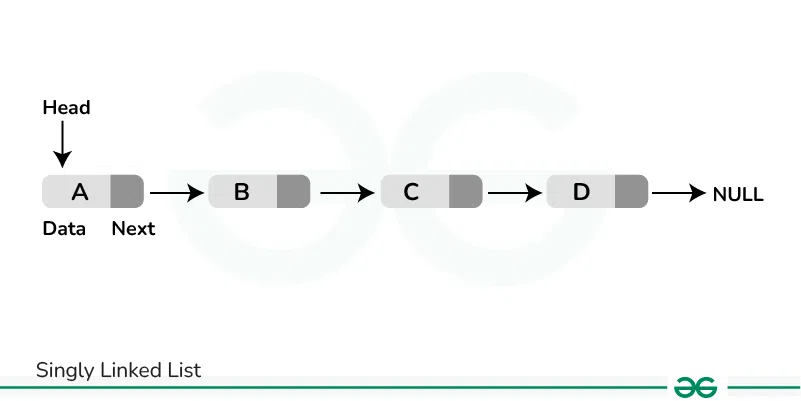

## Creating a linked list

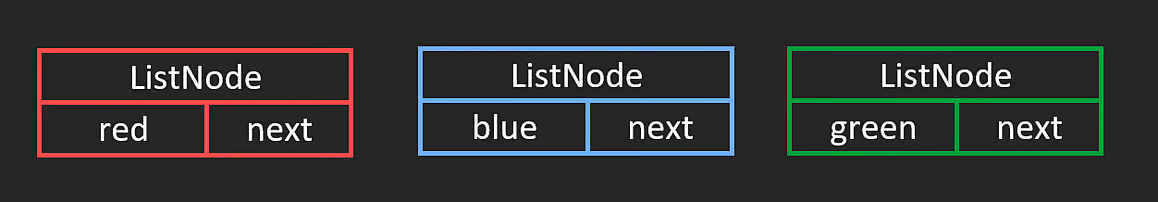

```python
class ListNode:
    def __init__(self, val):
        self.val = val
        self.next = None
```

Suppose that we have three ListNode objects – ListNode1, ListNode2, ListNode3. In this case, our value attribute is a string - red, blue, green. Using the `next` pointer of each object, we can connect the nodes together. 

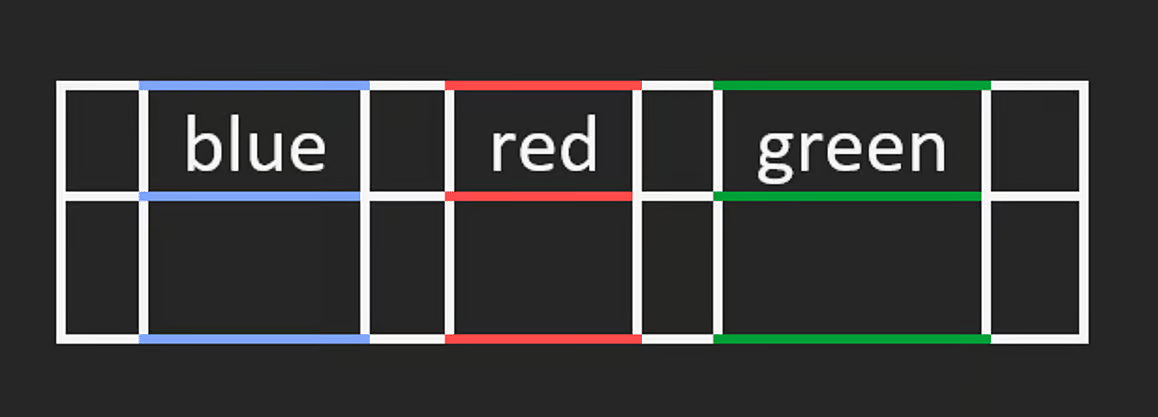

> When we instantiate a list node, we don't know where it is stored in memory. The nodes likely won't be contiguous like arrays, but that isn't an issue for linked lists.

Next, we would need to make sure that our next pointers point to another ListNode, and not null. Only the last node in the linked list would have its next pointer point to null.

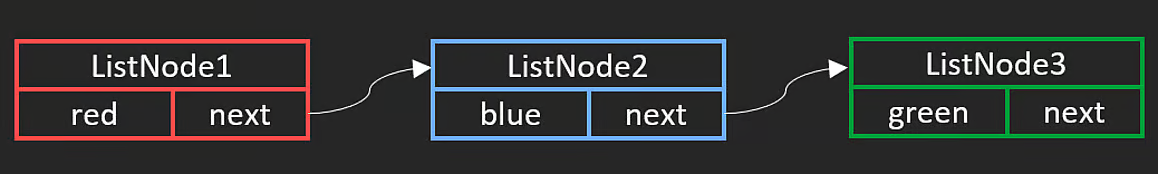

```python
ListNode1.next = ListNode2
ListNode2.next = ListNode3
ListNode3.next = null
```


## Traversal

To traverse a linked list from beginning to end, we can just make use of a simple while loop.

```python
#start at the head of the list, which is ListNode1. Assign it to cur
cur = ListNode1
#execute while loop until reach the end
while cur:
    #update cur to the next node
    cur = cur.next
```

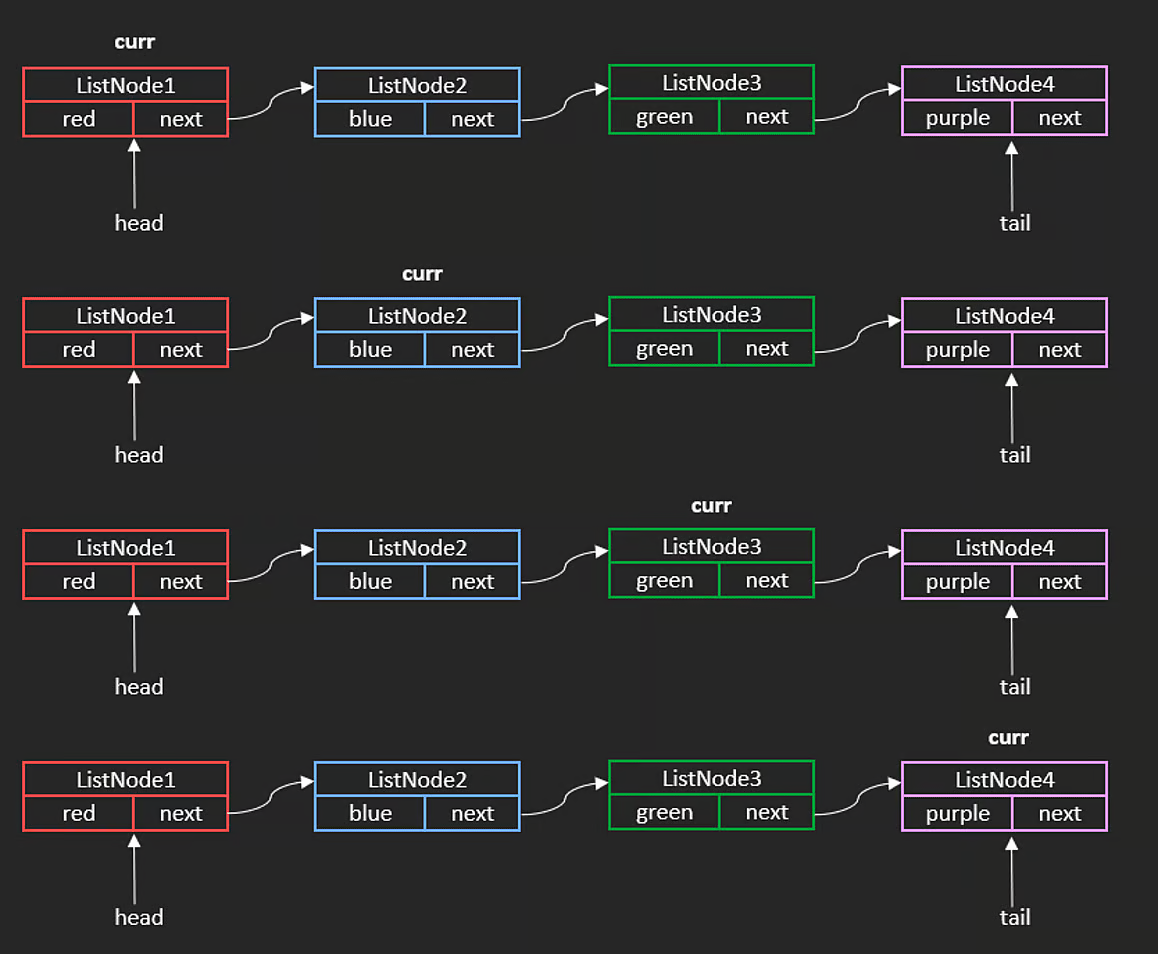

This traversal runs in $O(n)$ time


## Circular Linked List

If we set `ListNode3`’s (tail) next pointer is set to `ListNode1` (head) instead of null. This results in a circular linked list - attempting to iterate through this will create an infinite loop

## Operations of a linked list

### Appending

An advantage that Linked Lists have over arrays is that inserting a new element can be performed in $O(1)$ time, even if we insert in the middle. We do not have to shift any elements since there is no requirement for the elements to be stored contiguously in memory.

> This assumes we already have a reference to the node at the desired position we want to insert. If we have to traverse the list (like search over it) to arrive at the insertion point, the operation would still take $O(n)$ time.

If we wanted to append a `ListNode4` to the end of the list, we would be appending to the tail `ListNode3`. Once `ListNode4` is appended, we update our tail pointer to be at ListNode4. This is $O(1)$ time.

```python
#next property of current tail
tail.next = ListNode4
#reassign the tail pointer
tail = ListNode4
```

### Deleting

Deleting a node from a singly linked list will take $O(1)$ since we can accomplish this by updating a single pointer. (again assuming if we have a reference to that position already).

Suppose we have `ListNode1` (head) -> `ListNode2` -> `ListNode3` -> `ListNode4` (tail) and want to delete `ListNode2`. We simply shift the pointer of `ListNode1` so that

```python
ListNode1.next = ListNode1.next.next
```

---

## Time complexity

| Operation | Big-O Time Complexity | Notes |
|:-|:-|-:|
| Access | O(n) | |
| Search | O(n) | |
| Insertion | O(1)* | Assumes reference to desired node |
| Deletion | O(1)* | Assumes reference to desired node |



## Problem: Implement Linked List
Your LinkedList class should support the following operations:

- LinkedList() will initialize an empty linked list.
- int get(int i) will return the value of the ith node (0-indexed). If the index is out of bounds, return -1.
- void insertHead(int val) will insert a node with val at the head of the list.
- void insertTail(int val) will insert a node with val at the tail of the list.
- int remove(int i) will remove the ith node (0-indexed). If the index is out of bounds, return false, otherwise return true.
- int[] getValues() return an array of all the values in the linked list, ordered from head to tail.

In [44]:
#my implementation
class LinkedList:
    #note whether u want to start curr from the real or dummy note. the i=0 is always initially tho
    
    def __init__(self):
        self.head=ListNode(-1)
        #start with tail in itself
        self.tail=self.head

    
    def get(self, index: int) -> int:
        i=0
        curr=self.head.next
        while curr:
            if i==index:
                return curr.val
            else:
                #go to the next node
                i+=1
                curr=curr.next
        #curr has reach None, overshot the last node
        return -1

    def insertHead(self, val: int) -> None:
        new=ListNode(val)
        #if list is not empty
        if self.head!= self.tail:
            #move pointer to the current real first node
            new.next=self.head.next
            #move pointer of dummy to this new node
            self.head.next=new
        # this is also a tail node
        else:
            new.next=None
            self.tail=new
            self.head.next=self.tail


    def insertTail(self, val: int) -> None:
        #connect old last node to new node
        self.tail.next=ListNode(val)
        #move tail pointer
        self.tail=self.tail.next

    def remove(self, index: int) -> bool:
        i=0
        curr=self.head
        #as long as curr.next has a value, its fine
        #if its none, means you got to the last node, not possible as
        # operating from last node perspective
        while curr.next:
            #print(f'curr value is {curr.val} and next value to be removed is {curr.next.val}')
            if i==index:
                #2 nodes later still exist
                if curr.next.next:
                    print(f'pruned normal node of val {curr.next.val}')
                    curr.next=curr.next.next
                #curr is the 2nd last node
                else:
                    curr.next=None
                    self.tail=curr
                return True
            else:
                curr=curr.next
                i+=1
        return False

    def getValues(self) -> List[int]:
        l=[]
        curr=self.head.next
        while curr:
            print(curr.val)
            l.append(curr.val)
            curr=curr.next
        return l

class ListNode:
    def __init__(self, val):
        self.val=val
        self.next=None

In [45]:
ex1=LinkedList()
ex1.insertHead(1)
print(ex1.getValues())
ex1.insertTail(2)
print(ex1.getValues())
ex1.insertHead(0)
print(ex1.getValues())
ex1.remove(1)
print(ex1.getValues())

1
[1]
1
2
[1, 2]
0
1
2
[0, 1, 2]
pruned normal node of val 1
0
2
[0, 2]


In [43]:
ex1=LinkedList()
ex1.insertTail(1)
print(ex1.getValues())
ex1.insertTail(2)
print(ex1.getValues())
print(ex1.get(1))
ex1.remove(1)
print(ex1.getValues())
ex1.insertTail(2)
print(ex1.getValues())

1
[1]
1
2
[1, 2]
1
curr value is -1 and next value to be removed is 1
curr value is 1 and next value to be removed is 2
1
[1]
1
2
[1, 2]


In [74]:
from typing import List

#their implementation
# Singly Linked List Node
class ListNode:
    def __init__(self, val=-1, next=None):
        self.val = val #this is an integer rep
        self.next = next #this is literally the next object

# Implementation for Singly Linked List
class LinkedList:
    #self.head is ALWAYS the dummy node, not actually in the linked list!
    def __init__(self):
        # Init the list with a 'dummy' node which makes 
        # removing a node from the beginning of list easier.
        # this means self.head is always referring to the dummy node, and the next of dummy node is actually the first real node
        self.head = ListNode()
        self.tail = self.head
    
    def get(self, index: int) -> int:
        curr = self.head.next
        #currently at the first real node
        i = 0
        while curr:
            if i == index:
                return curr.val
            i += 1
            curr = curr.next
        #curr is None to get here
        return -1  # Index out of bounds or list is empty

    def insertHead(self, val: int) -> None:
        new_node = ListNode(val)
        #assign next of new node to the next of head node, which is a dummy node
        new_node.next = self.head.next
        #assign next of dummy head to this new node
        self.head.next = new_node
        #if dummy head was initially pointing to None
        if not new_node.next:  # If list was empty before insertion
            self.tail = new_node

    def insertTail(self, val: int) -> None:
        self.tail.next = ListNode(val)
        #weird reassigning trick
        self.tail = self.tail.next

    def remove(self, index: int) -> bool:
        i = 0
        #curr is initially the dummy node! different from before. For remove you operate from perspective of prior node, prior to the one u wanna remove
        curr = self.head # this is because the thing you want to remove has zero index and is after this curr
        #smart, if satisfy index and curr isnt None then advance
        while i < index and curr:
            i += 1
            curr = curr.next
        
        # Remove the node ahead of curr
        if curr and curr.next: # still has elems in front and curr isnt None
            if curr.next == self.tail:
                self.tail = curr
            curr.next = curr.next.next
            return True
        return False

    def getValues(self) -> List[int]:
        curr = self.head.next
        res = []
        while curr:
            res.append(curr.val)
            curr = curr.next
        return res

## Problem: Reverse a linked list

https://neetcode.io/problems/reverse-a-linked-list

In [77]:
from typing import Optional

#mysolution
class Solution:
    def reverseList(self, head: Optional[ListNode]) -> Optional[ListNode]:
        #use 2 trackers
        prev, curr = None, head

        while curr:
            print_prev= 'None' if not prev else prev.val
            print(f'prev val is {print_prev} and current val is {curr.val}')
            temp=ListNode(val=curr.val,next=curr.next)
            curr.next=prev
            prev=curr
            curr=temp.next
        return prev


In [78]:
ex1=LinkedList()
ex1.insertTail(0)
ex1.insertTail(1)
ex1.insertTail(2)
ex1.insertTail(3)
sol=Solution()
#assume you start from the real head node
print(sol.reverseList(ex1.head.next))

prev val is None and current val is 0
prev val is 0 and current val is 1
prev val is 1 and current val is 2
prev val is 2 and current val is 3


## Problem: Merge 2 sorted linked lists

https://neetcode.io/problems/merge-two-sorted-linked-lists

In [155]:
class Solution:
    def mergeTwoLists(self, list1: Optional[ListNode], list2: Optional[ListNode]) -> Optional[ListNode]:
        dummy=ListNode()
        merge=dummy

        curr1, curr2 = list1, list2
        #as long as either one still has a next node
        #either one hasnt reached the end yet
        while (curr1 and curr2):
            print(f'curr1 is {curr1.val} and curr2 is {curr2.val}')
            if curr1.val<curr2.val:
                merge.next=curr1
                curr1=curr1.next
            else:
                merge.next=curr2
                curr2=curr2.next
            merge=merge.next

        if curr1:
            merge.next=curr1
        elif curr2:
            merge.next=curr2
            
        # print('='*50)
        # curr=dummy
        # while curr:
        #     print(curr.val)
        #     curr=curr.next
        return dummy.next

In [156]:
ex1=LinkedList()
ex1.insertTail(1)
ex1.insertTail(2)
ex1.insertTail(6)
ex2=LinkedList()
ex2.insertTail(1)
ex2.insertTail(3)
ex2.insertTail(5)
sol=Solution()
#assume you start from the real head node
print(sol.mergeTwoLists(ex1.head.next, ex2.head.next))

curr1 is 1 and curr2 is 1
curr1 is 1 and curr2 is 3
curr1 is 2 and curr2 is 3
curr1 is 6 and curr2 is 3
curr1 is 6 and curr2 is 5


In [154]:
ex1=LinkedList()
ex2=LinkedList()
ex2.insertTail(1)
ex2.insertTail(2)
sol=Solution()
#assume you start from the real head node
print(sol.mergeTwoLists(ex1.head.next, ex2.head.next))

-1
1
2


In [ ]:
# their solution
# Iterative Solution
class Solution:
    def mergeTwoLists(self, list1: ListNode, list2: ListNode) -> ListNode:
        dummy = node = ListNode()

        while list1 and list2:
            if list1.val < list2.val:
                node.next = list1
                list1 = list1.next
            else:
                node.next = list2
                list2 = list2.next
            node = node.next

        #much cleaner way to get what i want, didnt know i could do this
        node.next = list1 or list2

        return dummy.next